<a href="https://colab.research.google.com/github/sindhuja279/ML_Lab/blob/main/1BM22CS279_Lab4_Logistic_Reggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Probability of leaving: 0.41
The employee will stay.


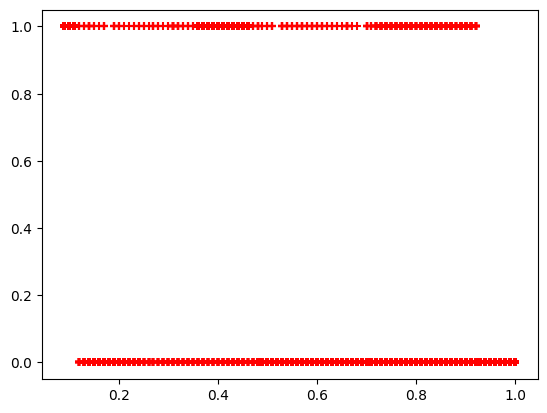

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load HR dataset
df = pd.read_csv("/content/HR_comma_sep (1).csv")
df.head()

plt.scatter(df.satisfaction_level, df.left, marker='+', color='red')

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level']], df.left, train_size=0.9, random_state=10)
X_train.shape

X_test

# Training logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

X_test
y_test
y_predicted = model.predict(X_test)
y_predicted

model.score(X_test, y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[0.5]])

# model.coef_ indicates value of m in y=m*x + b equation
model.coef_

# model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

# Define sigmoid function and do the math manually
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(satisfaction_level):
    z = model.coef_[0][0] * satisfaction_level + model.intercept_[0]
    y = sigmoid(z)
    return y

satisfaction_level = 0.35
probability = prediction_function(satisfaction_level)
print(f"Probability of leaving: {probability:.2f}")

if probability >= 0.5:
    print("The employee will leave.")
else:
    print("The employee will stay.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



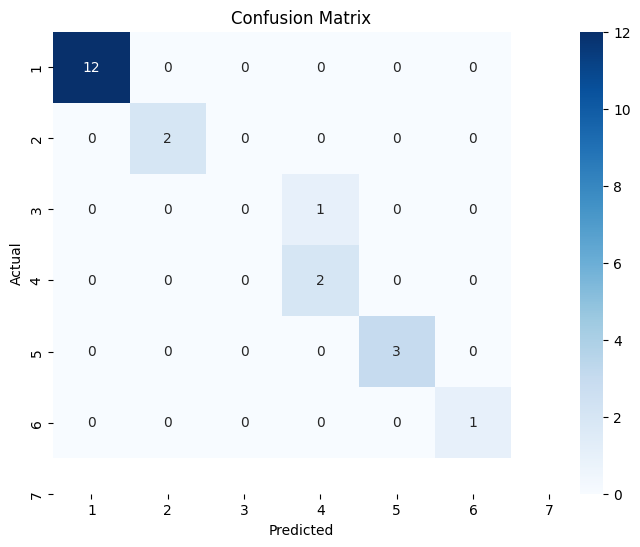

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "/content/zoo-data (1).csv"
df = pd.read_csv(file_path)

# Drop the animal_name column as it is not a feature
df = df.drop(columns=["animal_name"])

# Define features and target
X = df.drop(columns=["class_type"])
y = df["class_type"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = np.unique(y)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
